In [1]:
import sys
sys.path.append("../")

from src.data_loader import load_data
from src.preprocessing import clean_data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


(255780, 23)


In [3]:
df = load_data(r"D:\flight-fare-prediction\data\raw\Flight data.csv")
df = clean_data(df)

df.shape
df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
Index: 253222 entries, 0 to 255779
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             253222 non-null  object 
 1   Year            253222 non-null  int64  
 2   quarter         253222 non-null  int64  
 3   citymarketid_1  253222 non-null  int64  
 4   citymarketid_2  253222 non-null  int64  
 5   city1           253222 non-null  object 
 6   city2           253222 non-null  object 
 7   airportid_1     253222 non-null  int64  
 8   airportid_2     253222 non-null  int64  
 9   airport_1       253222 non-null  object 
 10  airport_2       253222 non-null  object 
 11  nsmiles         253222 non-null  int64  
 12  passengers      253222 non-null  int64  
 13  fare            253222 non-null  float64
 14  carrier_lg      251909 non-null  object 
 15  large_ms        251909 non-null  float64
 16  fare_lg         251909 non-null  float64
 17  carrier_low    

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,253222.000000,253222.000000,253222.000000,253222.000000,253222.000000,253222.000000,253222.000000,253222.000000,253222.000000,251909.000000,251909.000000,251840.000000,251840.000000
mean,2009.146342,2.478351,31554.073149,32179.246625,12434.570709,13244.865529,1182.730217,306.518253,216.681343,0.666597,216.999836,0.451929,188.814507
std,9.053796,1.118215,1091.622104,1235.206538,1430.166307,1426.291240,698.442987,517.706199,71.974094,0.224376,77.116716,0.332969,66.421267
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30977.000000,11193.000000,12197.000000,626.000000,23.000000,165.340000,0.484100,162.220000,0.160000,139.740000
50%,2009.000000,2.000000,31295.000000,32211.000000,12266.000000,13303.000000,1014.000000,117.000000,209.900000,0.656200,208.960000,0.360000,181.860000
75%,2017.000000,3.000000,32467.000000,33192.000000,13486.000000,14679.000000,1698.000000,348.000000,262.540000,0.879500,263.550000,0.754000,230.130000
max,2025.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,457.290000,1.000000,1064.000000,1.000000,923.000000


Target Variable Distribution

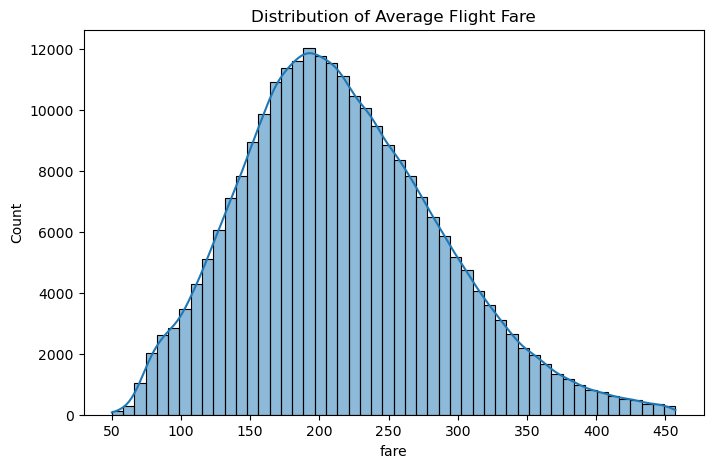

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["fare"], bins=50, kde=True)
plt.title("Distribution of Average Flight Fare")
plt.show()

Distance vs Fare

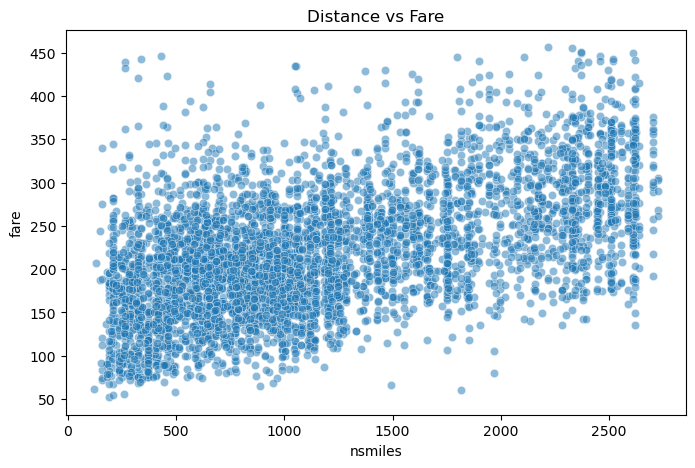

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="nsmiles",
    y="fare",
    data=df.sample(5000),
    alpha=0.5
)
plt.title("Distance vs Fare")
plt.show()


Demand vs Fare

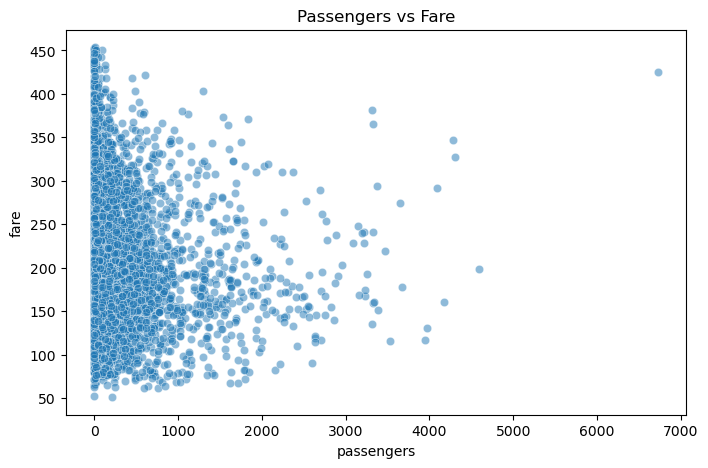

In [7]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="passengers",
    y="fare",
    data=df.sample(5000),
    alpha=0.5
)
plt.title("Passengers vs Fare")
plt.show()


Carrier Competition

In [9]:
df.groupby("carrier_lg")["fare"].mean().sort_values().head(10)


carrier_lg
P9     90.635610
KN     93.488000
ZV     96.200000
TB    101.827778
U2    102.370000
5J    105.454000
WV    105.698000
OO    106.572500
E9    107.692500
YV    109.589444
Name: fare, dtype: float64

In [10]:
df.groupby("carrier_low")["fare"].mean().sort_values().head(10)


carrier_low
A7     84.760000
EV     95.842500
ZV     96.200000
U2     99.161429
AQ    102.764821
P9    106.113939
TB    107.281765
E9    107.692500
WV    109.740247
C8    111.300000
Name: fare, dtype: float64

Seasonality

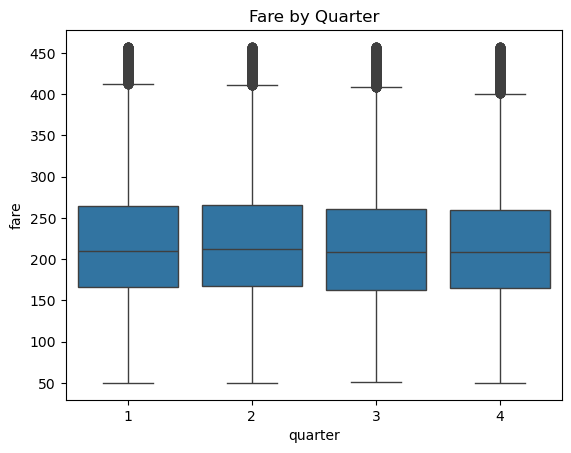

In [11]:
sns.boxplot(x="quarter", y="fare", data=df)
plt.title("Fare by Quarter")
plt.show()


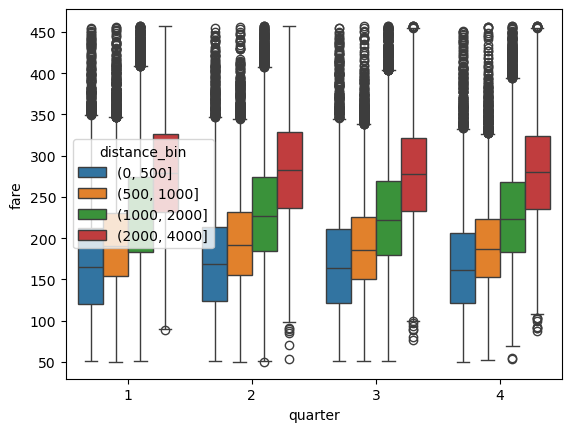

In [12]:
df["distance_bin"] = pd.cut(
    df["nsmiles"],
    bins=[0, 500, 1000, 2000, 4000]
)

sns.boxplot(x="quarter", y="fare", hue="distance_bin", data=df)
plt.show()


In [13]:
df.groupby("quarter")["fare"].mean()


quarter
1    218.105351
2    219.154785
3    214.531813
4    214.806853
Name: fare, dtype: float64

In [14]:
df.groupby("quarter")["fare"].median()


quarter
1    210.500
2    212.635
3    208.370
4    208.250
Name: fare, dtype: float64